In [1]:
import pandas as pd
import getpass, os
os.environ['PSQL_USER']='dengueadmin'
os.environ['PSQL_HOST']='localhost'
os.environ['PSQL_DB']='dengue'
os.environ['PSQL_PASSWORD']=getpass.getpass("Enter the database password: ")

Enter the database password: ········


In [2]:
os.chdir('..')
from infodenguepredict.data.infodengue import get_temperature_data, get_alerta_table, get_tweet_data
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading The Data

for our exploration let's pick the city of Rio de Janeiro.

In [3]:
A = get_alerta_table(3304557)#(3303500)
T = get_temperature_data(3304557)#(3303500)
Tw = get_tweet_data(3304557)#(3303500)

Let's look at the tables

In [4]:
A.head()

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,versao_modelo,municipio_nome
data_iniSE,,,,,,,,,,,,
2010-01-03,201001,30.0,30,30,30,3304557,0.0,0.461621,0,1,2017-03-23,Rio de Janeiro
2010-01-10,201002,46.0,46,46,46,3304557,0.0,0.707819,0,1,2017-03-23,Rio de Janeiro
2010-01-17,201003,30.0,30,30,30,3304557,0.0,0.461621,0,1,2017-03-23,Rio de Janeiro
2010-01-24,201004,51.0,51,51,51,3304557,0.0,0.784756,0,1,2017-03-23,Rio de Janeiro
2010-01-31,201005,58.0,58,58,58,3304557,0.0,0.892467,0,1,2017-03-23,Rio de Janeiro


In [5]:
T = T[~T.index.duplicated()]
T.head()

,temp_min,temp_max,umid_min,pressao_min
data_dia,,,,
2011-12-31,22.0,29.0,57.0,1007.0
2012-01-01,23.0,28.0,65.0,1003.0
2012-01-02,21.0,23.0,75.0,1003.0
2012-01-03,20.0,28.0,49.0,1008.0
2012-01-04,22.0,28.0,52.0,1011.0


In [6]:
Tw = Tw[~Tw.index.duplicated()]
Tw.head()

,numero,CID10_codigo
data_dia,,
2012-08-01,26,A90
2012-08-02,10,A90
2012-08-03,31,A90
2012-08-04,15,A90
2012-08-05,8,A90


Let's try to join the tables by date. To align them, we must downsample each one to a weekly time frame

In [7]:
T.resample('W-SUN').mean().tail()


,temp_min,temp_max,umid_min,pressao_min
data_dia,,,,
2017-02-26,24.000000,26.857143,61.714286,1012.285714
2017-03-05,24.285714,27.428571,68.000000,1008.428571
2017-03-12,24.428571,27.142857,72.000000,1010.857143
2017-03-19,23.285714,26.714286,70.857143,1011.142857
2017-03-26,20.000000,21.500000,81.500000,1017.750000


In [8]:
Full = A.join(T.resample('W-SUN').mean()).join(Tw.resample('W-SUN').sum())
Full.head()

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,versao_modelo,municipio_nome,temp_min,temp_max,umid_min,pressao_min,numero
data_iniSE,,,,,,,,,,,,,,,,,
2010-01-03,201001,30.0,30,30,30,3304557,0.0,0.461621,0,1,2017-03-23,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN
2010-01-10,201002,46.0,46,46,46,3304557,0.0,0.707819,0,1,2017-03-23,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN
2010-01-17,201003,30.0,30,30,30,3304557,0.0,0.461621,0,1,2017-03-23,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN
2010-01-24,201004,51.0,51,51,51,3304557,0.0,0.784756,0,1,2017-03-23,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN
2010-01-31,201005,58.0,58,58,58,3304557,0.0,0.892467,0,1,2017-03-23,Rio de Janeiro,NaN,NaN,NaN,NaN,NaN


Note que as datas para as datas mais antigas os dados faltantes de Temperatura e Tweets, foram substituídos por NaN. Podemos remover estas datas, ficando com uma tabela sem dados faltantes. Mas perde-se mais de dois anos de dados.

In [9]:
Short = Full.dropna()
Short.head()

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,versao_modelo,municipio_nome,temp_min,temp_max,umid_min,pressao_min,numero
data_iniSE,,,,,,,,,,,,,,,,,
2012-08-05,201232,452.0,452,452,452,3304557,1.278890e-10,6.95509,0,1,2017-03-23,Rio de Janeiro,18.571429,28.000000,40.142857,886.857143,90.0
2012-08-12,201233,478.0,478,478,478,3304557,6.105840e-03,7.35516,0,1,2017-03-23,Rio de Janeiro,16.142857,26.714286,34.571429,1019.428571,83.0
2012-08-19,201234,377.0,377,377,377,3304557,5.351960e-05,5.80104,0,1,2017-03-23,Rio de Janeiro,17.571429,27.714286,39.857143,1023.000000,63.0
2012-08-26,201235,326.0,326,326,326,3304557,2.434650e-05,5.01628,0,1,2017-03-23,Rio de Janeiro,16.857143,28.142857,31.571429,1020.571429,57.0
2012-09-02,201236,211.0,211,211,211,3304557,1.869840e-12,3.24673,0,1,2017-03-23,Rio de Janeiro,17.714286,25.428571,40.142857,1017.857143,64.0


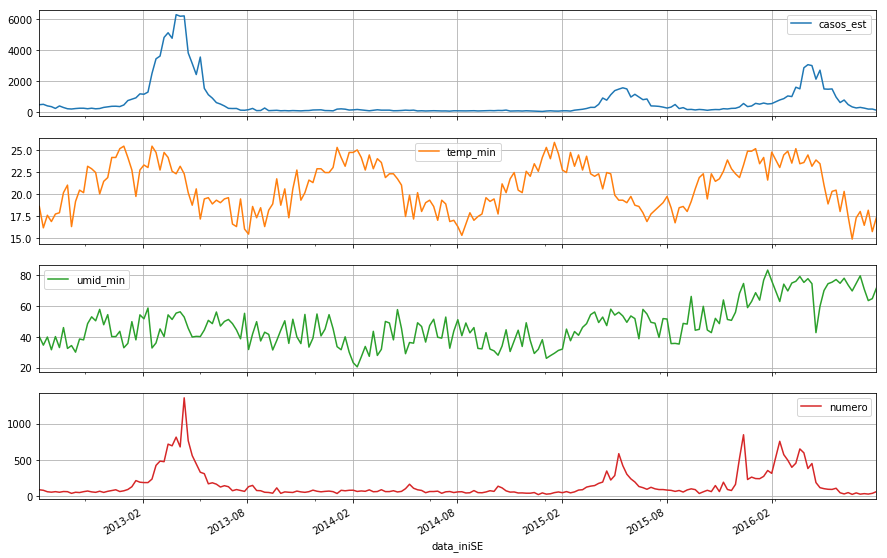

In [10]:
Short[['casos_est', 'temp_min', 'umid_min', 'numero']].plot(subplots=True, figsize=(15,10),grid=True);

# Calculando uma previsão

In [11]:
from infodenguepredict.models import sarimax,GAS,GASX
import statsmodels.api as sm

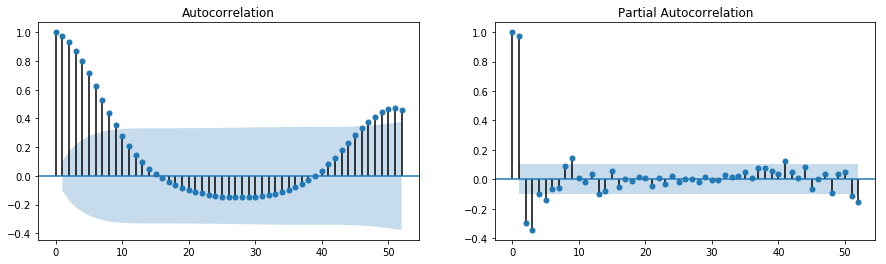

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

fig = sm.graphics.tsa.plot_acf(Full.ix[1:, 'casos'], lags=52, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(Full.ix[1:, 'casos'], lags=52, ax=axes[1])

In [13]:
# Short.casos = Short.casos.apply(pd.np.log) 
model_1 = sarimax.build_model(Full, 'casos', [])

In [14]:
fit_1 = model_1.fit()

In [15]:
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             casos   No. Observations:                  376
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 8)   Log Likelihood               -2651.063
Date:                           Thu, 23 Mar 2017   AIC                           5316.126
Time:                                   13:20:44   BIC                           5343.633
Sample:                               01-03-2010   HQIC                          5327.045
                                    - 03-12-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4361      0.083      5.273      0.000       0.274       0.598
ar.L2          0.2606      0.048      5.378      0.000       0.166       0.356
ma.L1         -0.2937      0.082     -3.601      0.000      -0.453      -0.134
ar.S.L8       -0.1926      0.038     -5.069      0.000      -0.267      -0.118
ar.S.L16      -0.0666      0.108     -0.619      0.536      -0.277       0.144
ma.S.L8       -0.9781      0.116     -8.418      0.000      -1.206      -0.750
sigma2      2.208e+05   2.14e+04     10.336      0.000    1.79e+05    2.63e+05
===================================================================================
Ljung-Box (Q):                       35.55   Jarque-Bera (JB):              3194.84
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -1.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

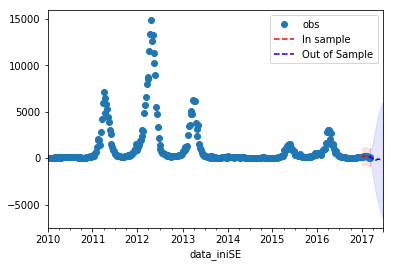

In [16]:
def plot_pred(fit):
    predict = fit.get_prediction(start='2017-01-01', dynamic=False)
    predict_ci = predict.conf_int()
    Full.casos.plot(style='o',label='obs')
    predict.predicted_mean.plot(style='r--', label='In sample')
    plt.fill_between(predict_ci.index, predict_ci.ix[:, 0], predict_ci.ix[:, 1], color='r', alpha=0.1)
    forecast = fit.get_prediction(start='2017-03-05', end='2017-06-21', dynamic=False)
    forecast_ci = forecast.conf_int()
    forecast.predicted_mean.plot(style='b--', label='Out of Sample')
    plt.fill_between(forecast_ci.index, forecast_ci.ix[:, 0], forecast_ci.ix[:, 1], color='b', alpha=0.1)
    plt.legend(loc=0)
plot_pred(fit_1)

In [17]:
model_2 = GAS.build_model(Full, ar=2, sc=6, target='casos')
fit_2 = model_2.fit()

In [18]:
fit_2.summary()

PoissonGAS (2,0,6)                                                                                        
======================================================= ==================================================
Dependent Variable: casos                               Method: MLE                                       
Start Date: 2010-02-14 00:00:00                         Log Likelihood: -20462.3531                       
End Date: 2017-03-12 00:00:00                           AIC: 40942.7061                                   
Number of observations: 370                             BIC: 40977.9277                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.857      0.0138     61.9415  0.0      (0.8299 | 0.8841)        
AR(1)                                

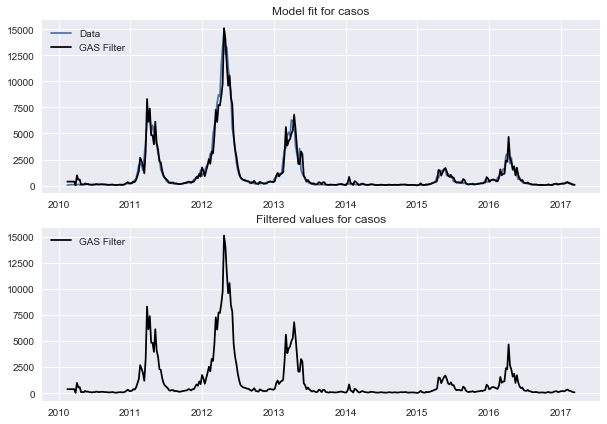

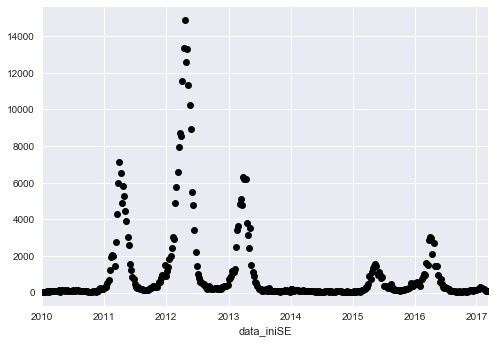

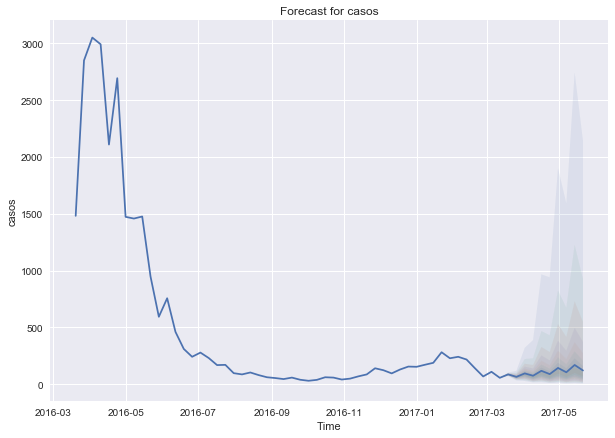

In [19]:
model_2.plot_fit()
plt.savefig('GAS_in_sample.png')
Full.casos.plot(style='ko')
model_2.plot_predict(h=10, past_values=52)

# Looking at state-wide data

In [46]:
rio  = get_alerta_table(state='RJ')

In [47]:
rio.head()

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,versao_modelo,municipio_nome
data_iniSE,,,,,,,,,,,,
2010-01-03,201001,9.0,9,9,9,3300100,0.0,4.866440,0,1,2017-01-25,Angra dos Reis
2010-01-03,201001,0.0,0,0,0,3300159,0.0,0.000000,0,1,2017-01-25,Aperibé
2010-01-03,201001,1.0,1,1,1,3300209,0.0,0.826802,0,1,2017-01-25,Araruama
2010-01-03,201001,0.0,0,0,0,3300225,0.0,0.000000,0,1,2017-01-25,Areal
2010-01-03,201001,0.0,0,0,0,3300233,0.0,0.000000,0,1,2017-01-25,Armação dos Búzios


Let's keep only the columns we want to use

In [48]:
for col in ['casos_est_min', 'casos_est_max', 'Localidade_id', 'versao_modelo', 'municipio_nome']:
    del rio[col]

In [49]:
rio.head()

,SE,casos_est,casos,municipio_geocodigo,p_rt1,p_inc100k,nivel
data_iniSE,,,,,,,
2010-01-03,201001,9.0,9,3300100,0.0,4.866440,1
2010-01-03,201001,0.0,0,3300159,0.0,0.000000,1
2010-01-03,201001,1.0,1,3300209,0.0,0.826802,1
2010-01-03,201001,0.0,0,3300225,0.0,0.000000,1
2010-01-03,201001,0.0,0,3300233,0.0,0.000000,1


### Converting dataframe from long format to wide format

The dataframe currently have all cities stacked on top of each other. In order to use this data in a predictive model, we need this table in wide format, that is, have only time along the rows and have cities variable listed as columns.

In [50]:
riopiv = rio.pivot(index=rio.index, columns='municipio_geocodigo')

In [51]:
riopiv.head()

SE                                                  \
municipio_geocodigo 3300100 3300159 3300209 3300225 3300233 3300258 3300308   
data_iniSE                                                                    
2010-01-03           201001  201001  201001  201001  201001  201001  201001   
2010-01-10           201002  201002  201002  201002  201002  201002  201002   
2010-01-17           201003  201003  201003  201003  201003  201003  201003   
2010-01-24           201004  201004  201004  201004  201004  201004  201004   
2010-01-31           201005  201005  201005  201005  201005  201005  201005   

                                              ...     nivel                  \
municipio_geocodigo 3300407 3300456 3300506   ...   3305604 3305703 3305752   
data_iniSE                                    ...                             
2010-01-03           201001  201001  201001   ...         1       1       1   
2010-01-10           201002  201002  201002   ...         1       1       1   
2010-01-17           201003  201003  201003   ...         1       1       1   
2010-01-24           201004  201004  201004   ...         1       1       4   
2010-01-31           201005  201005  201005   ...         1       1       4   

                                                                             
municipio_geocodigo 3305802 3305901 3306008 3306107 3306156 3306206 3306305  
data_iniSE                                                                   
2010-01-03                1       1       1       1       1       1       1  
2010-01-10                1       1       1       1       1       1       1  
2010-01-17                1       1       1       1       1       1       1  
2010-01-24                1       1       1       1       1       1       1  
2010-01-31                1       1       1       1       1       1       1  

[5 rows x 552 columns]

In [52]:
riopiv['SE'].head()

municipio_geocodigo,3300100,3300159,3300209,3300225,3300233,3300258,3300308,3300407,3300456,3300506,...,3305604,3305703,3305752,3305802,3305901,3306008,3306107,3306156,3306206,3306305
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2010-01-03,201001,201001,201001,201001,201001,201001,201001,201001,201001,201001,...,201001,201001,201001,201001,201001,201001,201001,201001,201001,201001
2010-01-10,201002,201002,201002,201002,201002,201002,201002,201002,201002,201002,...,201002,201002,201002,201002,201002,201002,201002,201002,201002,201002
2010-01-17,201003,201003,201003,201003,201003,201003,201003,201003,201003,201003,...,201003,201003,201003,201003,201003,201003,201003,201003,201003,201003
2010-01-24,201004,201004,201004,201004,201004,201004,201004,201004,201004,201004,...,201004,201004,201004,201004,201004,201004,201004,201004,201004,201004
2010-01-31,201005,201005,201005,201005,201005,201005,201005,201005,201005,201005,...,201005,201005,201005,201005,201005,201005,201005,201005,201005,201005


Now we have a multi-level column index. It may be preferable to flatten it.

In [53]:
riopiv.columns = ['{}_{}'.format(*col).strip() for col in riopiv.columns.values]
riopiv.head()

,SE_3300100,SE_3300159,SE_3300209,SE_3300225,SE_3300233,SE_3300258,SE_3300308,SE_3300407,SE_3300456,SE_3300506,...,nivel_3305604,nivel_3305703,nivel_3305752,nivel_3305802,nivel_3305901,nivel_3306008,nivel_3306107,nivel_3306156,nivel_3306206,nivel_3306305
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2010-01-03,201001,201001,201001,201001,201001,201001,201001,201001,201001,201001,...,1,1,1,1,1,1,1,1,1,1
2010-01-10,201002,201002,201002,201002,201002,201002,201002,201002,201002,201002,...,1,1,1,1,1,1,1,1,1,1
2010-01-17,201003,201003,201003,201003,201003,201003,201003,201003,201003,201003,...,1,1,1,1,1,1,1,1,1,1
2010-01-24,201004,201004,201004,201004,201004,201004,201004,201004,201004,201004,...,1,1,4,1,1,1,1,1,1,1
2010-01-31,201005,201005,201005,201005,201005,201005,201005,201005,201005,201005,...,1,1,4,1,1,1,1,1,1,1


In [54]:
riopiv.shape

(368, 552)